# Modelo e idea principal
# DEPV: Decaimiento Exponencial para Predicción de Vistas

$V(t) = V_{f}\cdot(1-e^{-t/\tau})$

Utilizando los datos históricos de los videos subidos se puede encontrar el valor de $\tau$ y el de $V_{f}$.

* $\tau$: Constante de tiempo del sistema. Cuando $t = 5\tau$, se considera que la cantidad de visitas no variará más ya que

  $V(5\tau) = V_{f}\cdot(1-e^{-5\tau/\tau}) = V_{f}\cdot(1-e^{-5}) \approx V_{f}$

  Cuando $t = \tau$, la cantidad de visitas representa el 63.21% de la cantidad de visitas final.
* $V_{f}$: Cantidad de vistas final.

Hay dos acercamientos posibles:

* Un solo modelo que tome en cuenta el promedio de todos los datos pasados.
* Un modelo por video y promediar sus salidas.

En este contexto, entrenar el modelo es encontrar (calcular) los parámetros $V_{f}$ y $\tau$.

Cosas importantes sobre $\tau$:

* La constante de tiempo depende de la dinámica del sistema, es decir, la rapidez de la difusión del video. Esto tiene que ver con la cantidad y rapidez con la que se comparte el video o le llega al feed de los demás usuarios.

Cosas importantes sobre $V_{f}$:

* Depende básicamente del alcance que tenga tu cuenta.

In [31]:
f'{(1 - np.exp(-1)) * 100:.2f}%'

'63.21%'

In [29]:
9 / 5

1.8

In [4]:
def V(t):
  A = 350
  tau = 9 / 5
  return A * (1 - np.exp(-t / tau))

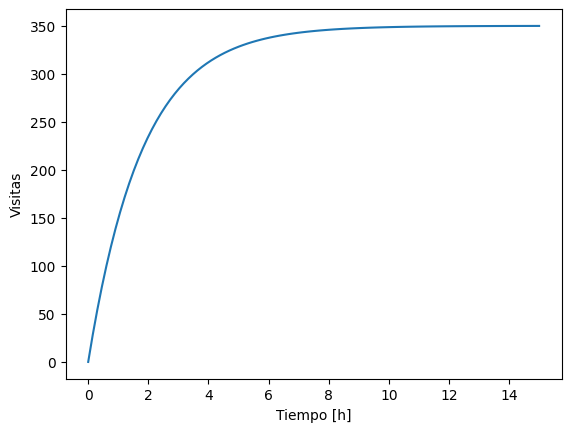

In [20]:
T = np.linspace(0, 15, 100)
Vs = [V(t) for t in T]
plt.plot(T, Vs)
plt.xlabel('Tiempo [h]')
plt.ylabel('Visitas')
plt.show()

In [ ]:
comunicate(instagram.com/egon)

In [5]:
V(0), V(9)

(0.0, 347.6417185503201)

In [1]:
from math import exp
import numpy as np
from matplotlib import pyplot as plt

In [28]:
V4 = 350
V3 = 320
V2 = 200
V1 = 100
print(np.mean([V4, V3, V2, V1]))
print((V4 + 0.95**1 * V3 + 0.95**2 * V2 + 0.95**3 * V1) / (0.95**0 + 0.95**1 + 0.95**2 + 0.95**3))

242.5
248.05081033727552


In [ ]:
# Funciones útiles

def prom_pond(lista, dcto):
  """
  Función: Calcula un promedio ponderado de la lista entregada

  Parámetros:
    lista -> Una lista de números
    dcto -> Descuento acumulativo aplicado para datos pasados
  """
  dctos = np.array([(1 - dcto) ** i for i in range(len(lista))])
  lista = np.array(lista)
  lista_ponderada = dctos * lista
  lista_ponderada = lista_ponderada.tolist()
  return sum(lista_ponderada) / sum(dctos)
###########################
def V(t, Vf, tau):
  """
  Función: Calcula la cantidad de vistas en función del tiempo

  Parámetros:
    t -> Tiempo de consulta
    Vf -> Cantidad de vistas final
    tau -> Constante de tiempo del sistema
  """
  return Vf * (1 - exp(-t / tau))  * sen(2 * pi * t/24)
###########################
def calc_Vf(T, A, tau):
  """
  Función: Calcula una estimación de la cantidad de vistas final de un video a partir de una observación/medición que tenga A vistas en t = T

  Parámetros:
    T -> Tiempo transcurrido entre la publicación del video la realización de la observación
    A -> Cantidad de vistas en el momento en que se realiza la observación
    tau -> Constante de tiempo del sistema
    """
  return A / (1 - exp(-T / tau))

Cantidad de vistas final para cada video

In [ ]:
# Videos anteriores
vistas_historicas = [1094, 1076, 1751] # [Último video, Penúltimo video, ..., Primer video]
# Tercer video
#vistas_actual = (588, 7) # (Cantidad de vistas actual, Tiempo transcurrido)
#vistas_actual = (952, 21) # Otra observación
vistas_actual = (192, 1)

# Primer enfoque: Un solo modelo

## Cálculo de $V_{f}$

Dado que $V_{f}$ es la cantidad final de vistas, la única forma de saber la cantidad de vistas que tendrá el video actual es usando las vistas finales de los videos anteriores.

Por esto se calcula el promedio ponderado de todas las vistas de los videos anteriores.

Es promedio ponderado ya que la cantidad de vistas de los videos más antiguos representa información desactualizada. La forma de ponderar es quitarle peso a los datos de las publicaciones más viejas (mientras más vieja, menos peso tiene)

In [ ]:
help(prom_pond)

Help on function prom_pond in module __main__:

prom_pond(lista, dcto)
    Función: Calcula un promedio ponderado de la lista entregada
    
    Parámetros:
      lista -> Una lista de números
      dcto -> Descuento acumulativo aplicado para datos pasados



In [ ]:
dcto = 0.01 # Descuento del 1%
Vf = prom_pond(vistas_historicas, dcto)
Vf

1304.8029022591832

## Cálculo de $\tau$

Para obtener la constante de tiempo $\tau$ se debe analizar el video actual.

In [ ]:
vistas_actual

(192, 1)

A vistas en T horas ($V(T) = A$). Si se asume que la cantidad final de vistas será $V_{f}$ calculado, se puede despejar $\tau$ de $V(t) = V_{f}\cdot(1-e^{-t/\tau})$, lo que resulta

$\tau =-T / ln(1 - V(T) / V_{f})$

In [ ]:
A = vistas_actual[0] # Cantidad de vistas en el tiempo t = T, con A = V(T)
T = vistas_actual[1] # Tiempo de consulta
tau = -T / np.log(1 - A / Vf)
tau

6.282589877796764

Implica una constante de tiempo de 12.45 horas.

## Predicción del modelo




### En una hora

In [ ]:
help(V)

Help on function V in module __main__:

V(t, Vf, tau)
    Función: Calcula la cantidad de vistas en función del tiempo
    
    Parámetros:
      t -> Tiempo de consulta
      Vf -> Cantidad de vistas final
      tau -> Constante de tiempo del sistema



In [ ]:
T = 1
V(T, Vf, tau)

192.00000000000009

### En $\tau$ horas

In [ ]:
T = tau
V(T, Vf, tau)

824.7927397371988

### En $5\tau$ horas

In [ ]:
T = 5 * tau
V(T, Vf, tau)

1296.0112094595079

### En T horas

In [ ]:
T = 21
V(T, Vf, tau)

1258.6833627743863

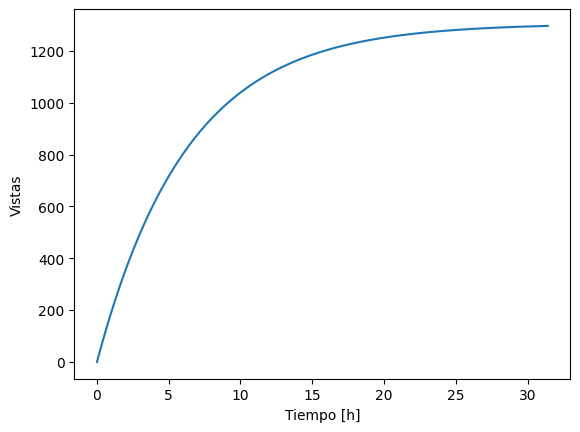

In [ ]:
ts = np.linspace(0, 5 * tau, 100)
Vs = [V(t, Vf, tau) for t in ts]
plt.plot(ts, Vs)
plt.ylabel('Vistas')
plt.xlabel('Tiempo [h]')
plt.show()

## Conclusiones

Lo que se desea predecir es la cantidad de visualizaciones totales a partir de la cantidad de visualizaciones en un tiempo determinado que sea representativo, por ejemplo 1 hora.

Se puede ver en los cálculos de "Predicción del modelo" que para el $V_{f}$ supuesto y el $\tau$ calculado, teniendo aproximadamente 106 vistas una hora después de haber publicado el video, se lograrían aproximadamente 1358 vistas.

Lo que es importante y va a tender a ser constante* ya que describe la dinámica del sistema y como interactúa el video con la red es la constante de tiempo $\tau$. Debido a esto, para estimar la cantidad de vistas totales del video actual, se usa una medición de la cantidad de vistas en un tiempo $t = T$.

Recordando:

$V(t) = V_{f}\cdot(1 - e^{-t / \tau})$

Despejando $V_{f}$:

$V_{f} = \frac{V(t)}{(1 - e^{-t / \tau})}$

Reemplazando $t = T$:

$V_{f} = \frac{V(T)}{(1 - e^{-T / \tau})}$

Se debe tener en cuenta que se conoce $\tau$, ya que se calculó anteriormente y resultó de 12.45 horas.

In [ ]:
help(calc_Vf)

Help on function calc_Vf in module __main__:

calc_Vf(T, A, tau)
    Función: Calcula una estimación de la cantidad de vistas final de un video a partir de una observación/medición que tenga A vistas en t = T
    
    Parámetros:
      T -> Tiempo transcurrido entre la publicación del video la realización de la observación
      A -> Cantidad de vistas en el momento en que se realiza la observación
      tau -> Constante de tiempo del sistema



In [ ]:
T = 22
A = 1000
Vf_calc = calc_Vf(T, A, tau)
Vf_calc

1418.34830702578

# Segundo enfoque: un modelo por video

Para este enfoque se debe tener al menos dos valores registrados para cada video. Los datos que tenemos ahora son insuficientes, por lo que se deja para más adelante.